In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clim = pd.read_csv("climate_2009.csv", index_col = 0)
clim.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [3]:
clim = clim.reset_index()
df = clim[["Date Time", "T (degC)"]].rename(columns= {"T (degC)":"T", "Date Time": "datetime"})
df.head()

,datetime,T
0,01.01.2009 00:10:00,-8.02
1,01.01.2009 00:20:00,-8.41
2,01.01.2009 00:30:00,-8.51
3,01.01.2009 00:40:00,-8.31
4,01.01.2009 00:50:00,-8.27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10589 entries, 0 to 10588
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  10589 non-null  object 
 1   T         10589 non-null  float64
dtypes: float64(1), object(1)
memory usage: 165.6+ KB


In [5]:
import datetime

df["datetime"] = pd.to_datetime(df["datetime"], format = '%d.%m.%Y %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10589 entries, 0 to 10588
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  10589 non-null  datetime64[ns]
 1   T         10589 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 165.6 KB


In [6]:
df.head()

,datetime,T
0,2009-01-01 00:10:00,-8.02
1,2009-01-01 00:20:00,-8.41
2,2009-01-01 00:30:00,-8.51
3,2009-01-01 00:40:00,-8.31
4,2009-01-01 00:50:00,-8.27


In [7]:
# Merge the ten minute windows into an hour window - hourly temporal resolution
df_hour_lvl = df[5::6].reset_index().drop("index", axis = 1)
df_hour_lvl.head()

,datetime,T
0,2009-01-01 01:00:00,-8.05
1,2009-01-01 02:00:00,-8.88
2,2009-01-01 03:00:00,-8.81
3,2009-01-01 04:00:00,-9.05
4,2009-01-01 05:00:00,-9.63


C:\Users\Admin\AppData\Local\Temp\ipykernel_3924\1043498097.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hour_lvl["T"])


<Axes: xlabel='T', ylabel='Density'>

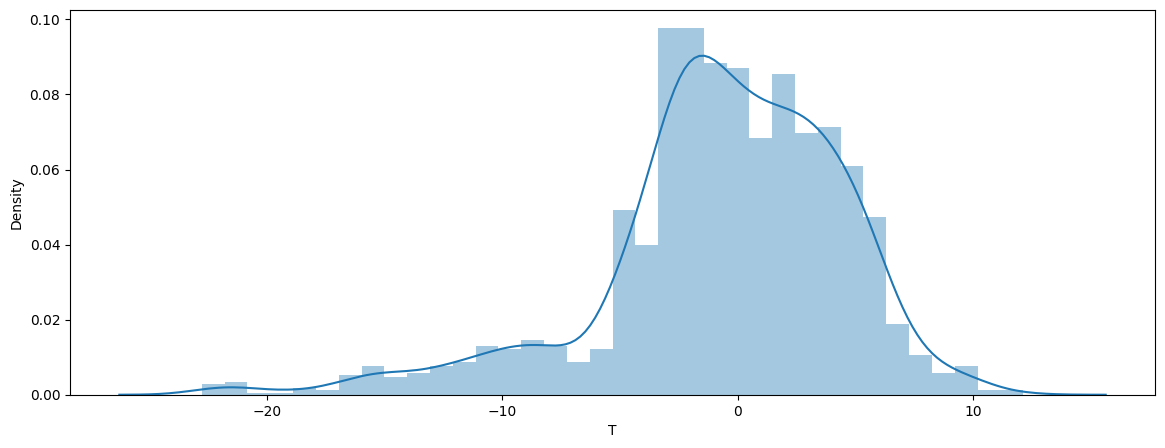

In [8]:
plt.figure(figsize = (14,5))
sns.distplot(df_hour_lvl["T"])

In [9]:
# Train - test split for LSTM
# input X sequence must be a 2D array[no of records, n_input]
def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []
    
    for i in range(len(df_np) - input_sequence):
        row = list( df_np[i:i + input_sequence])
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)
        
    return np.array(X), np.array(y)

In [10]:
n_input = 10 
df_min_model_data = df_hour_lvl['T']
X, y = Sequential_Input_LSTM(df_min_model_data, n_input)

In [11]:
X.shape, y.shape

((1754, 10), (1754,))

In [12]:
# Training data
X_train, y_train = X[:1400], y[:1400]

# Validation data
X_val, y_val = X[1400:1600], y[1400:1600]

# Test data
X_test, y_test = X[1600:], y[1600:]

In [13]:
print('Temp :')
print()
print(f'Total days      : {len(df_hour_lvl)/24}')
print(f'Training days   : {len(X_train)/24}')
print(f'Validation days : {len(X_val)/24}')
print(f'Testing days    : {len(X_test)/24}')

Temp :

Total days      : 73.5
Training days   : 58.333333333333336
Validation days : 8.333333333333334
Testing days    : 6.416666666666667


In [14]:
# Building LSTM
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam 


In [15]:
n_features = 1                        # number of input variables used for forecast (here, only 1 i.e. temperature)
model1 = Sequential()

model1.add(InputLayer((n_input,n_features)))
model1.add(LSTM(100, return_sequences = True))     
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(50))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,817 (593.04 KB)

 Trainable params: 151,817 (593.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, callbacks = [early_stop])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 24.8931 - root_mean_squared_error: 4.9893 - val_loss: 19.7063 - val_root_mean_squared_error: 4.4392
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 18.4455 - root_mean_squared_error: 4.2948 - val_loss: 16.5540 - val_root_mean_squared_error: 4.0687
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 14.7735 - root_mean_squared_error: 3.8436 - val_loss: 13.0963 - val_root_mean_squared_error: 3.6189
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 12.4375 - root_mean_squared_error: 3.5267 - val_loss: 11.0230 - val_root_mean_squared_error: 3.3201
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 10.9037 - root_mean_squared_error: 3.3021 - val_loss: 9.6889 - val_root_mean_squared_error: 3.1127
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.7956 - root_mean_squared_error: 3.1298 - val_loss: 8.8556 - val_root_mean_squared_error: 2.9758
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/ste

<Axes: >

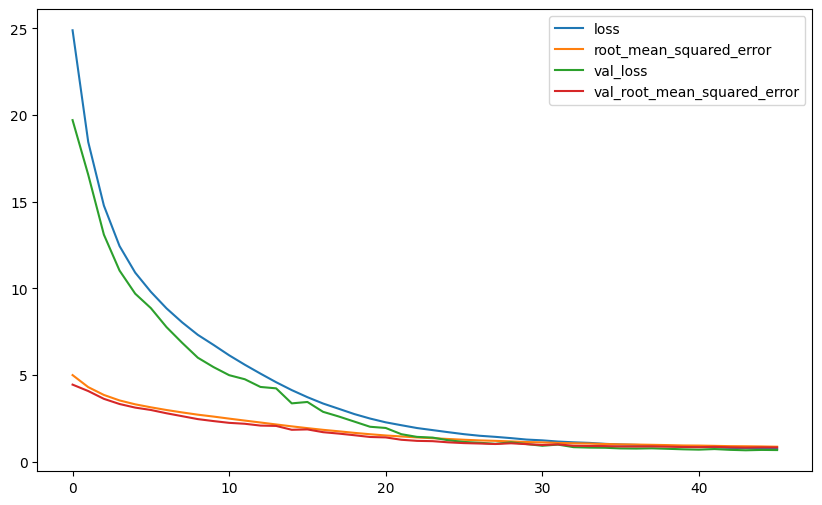

In [17]:
losses_df1 = pd.DataFrame(model1.history.history)
losses_df1.plot(figsize = (10,6))

In [18]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % ('RootMeanSquaredError', scores[1]*100))

loss: 89.38%
RootMeanSquaredError: 94.54%
